In [1]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=112034 sha256=88aea10fd1a2cdcbe980bd2420a164035d5d06f04ec57b3e493897e531799a59
  Stored in directory: /tmp/pip-ephem-wheel-cache-tigbmmgq/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [3]:
import matplotlib.pyplot as plt
import straph as sg

In [4]:
plt.rcParams["figure.figsize"] = (22,15)

# Temporal Metawalks in Stream Graph

In this tutorial we will use the example below, feel free to change it (cf: Notebook on random stream graphs).

In [12]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                      path_links=path_directory + "example_links.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  8
Nb of segmented links :  11.0
Nb of event times :  11


<AxesSubplot:xlabel='t', ylabel='Nodes'>

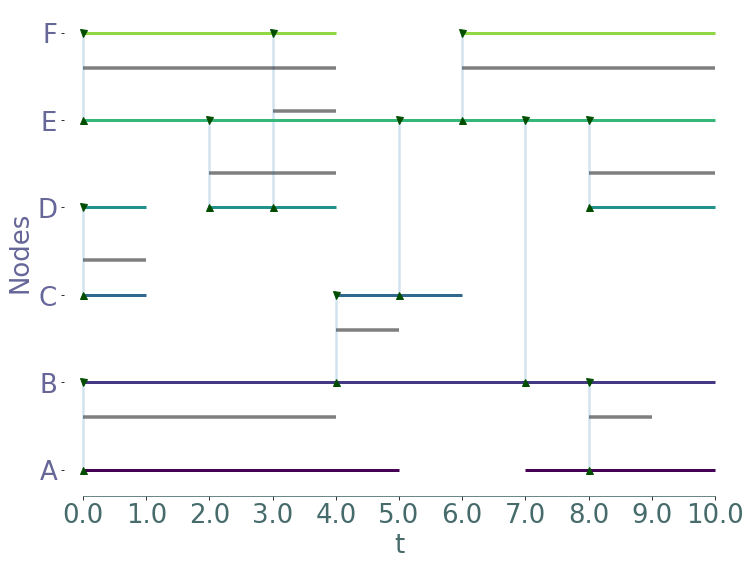

In [13]:
S.plot()

In [5]:
S.links

[(0, 1), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5)]

In [6]:
S.link_presence

[[0.0, 4.0, 8.0, 9.0],
 [4.0, 5.0],
 [7.0, 7.0],
 [0.0, 1.0],
 [5.0, 5.0],
 [2.0, 4.0, 8.0, 10.0],
 [3.0, 4.0],
 [0.0, 4.0, 6.0, 10.0]]

In the following we use Straph's API to compute different types of temporal paths.

 We can consider two types of source and destination : a temporal node $(t_0,t_1,v) \in \overline{W}$ or a node $u \in V$.
Resulting in 4 types of temporal paths:

    - temporal source -> destination
    - temporal source -> temporal destination
    - source -> temporal destination
    - source -> destination

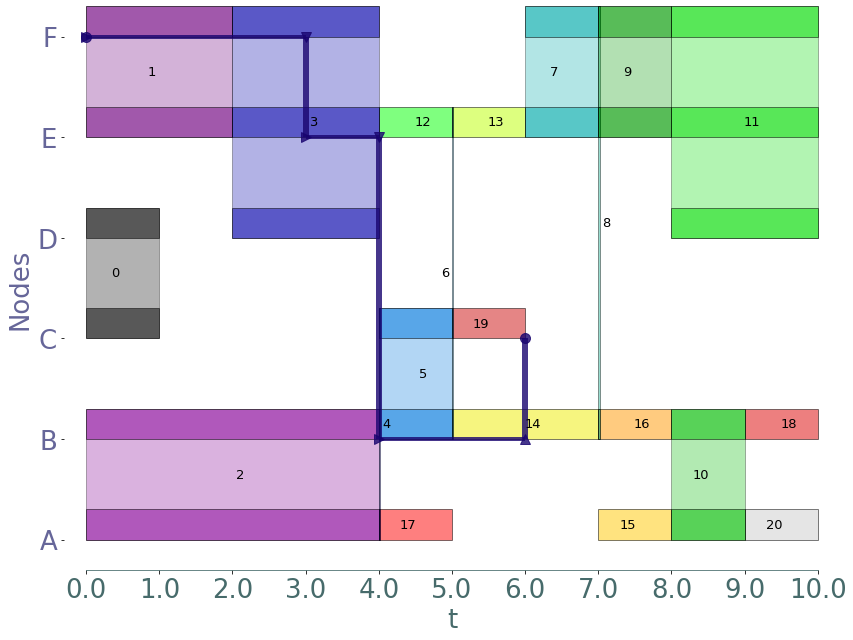

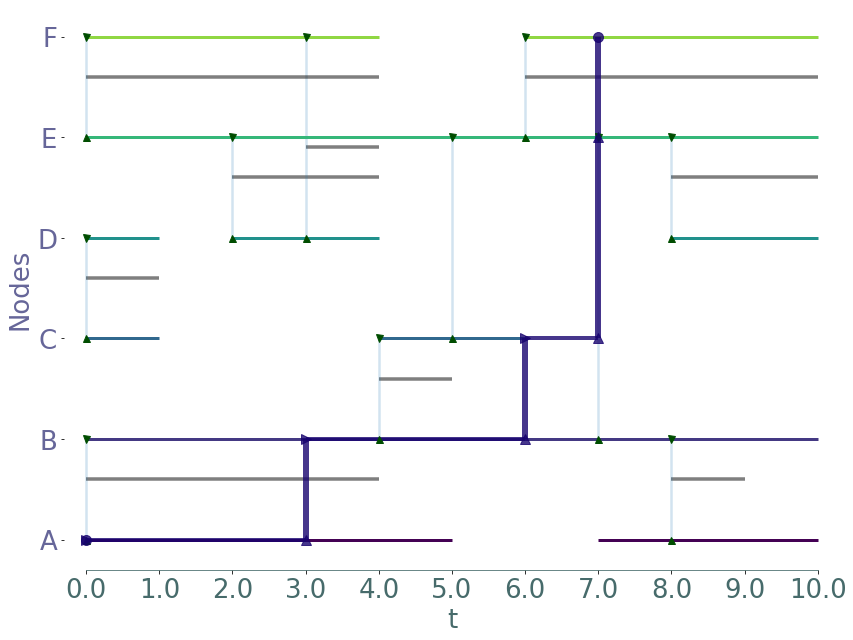

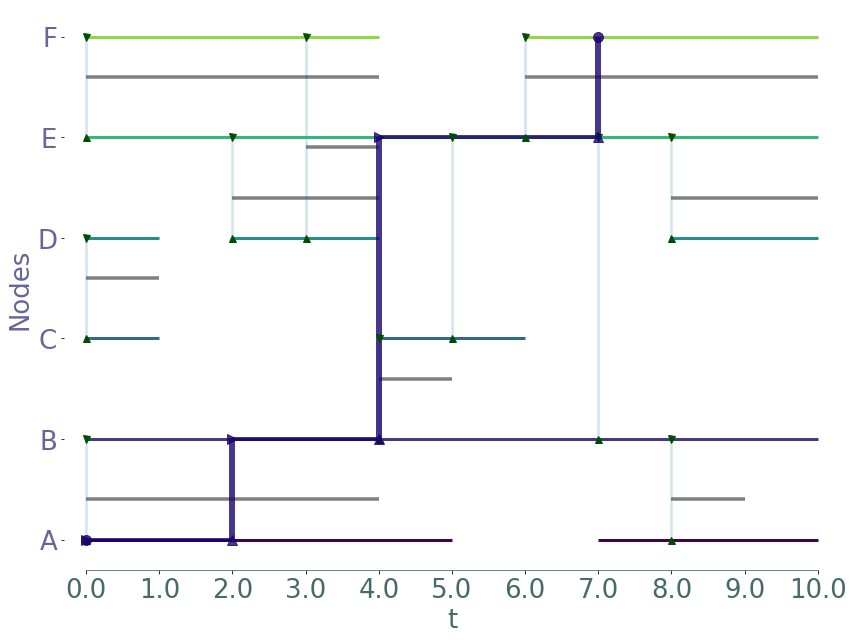

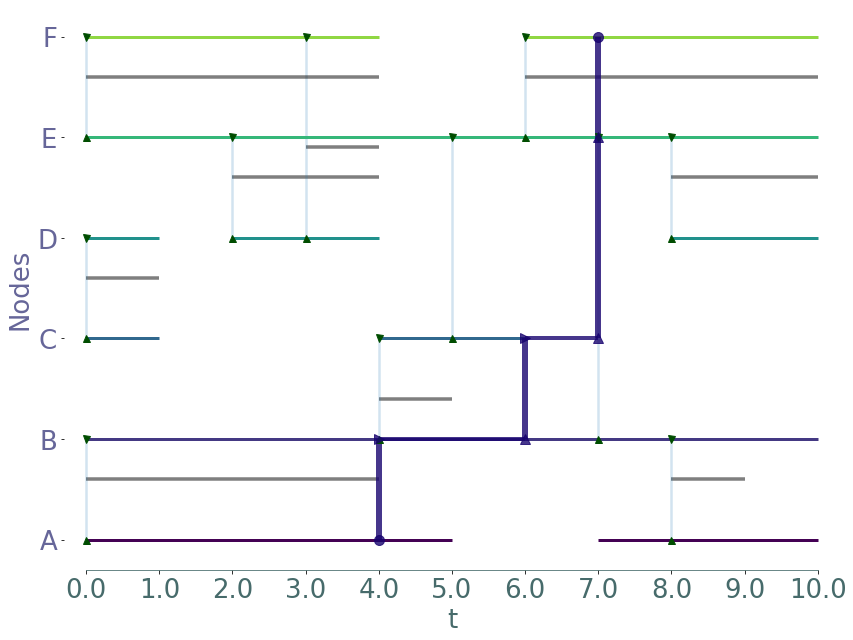

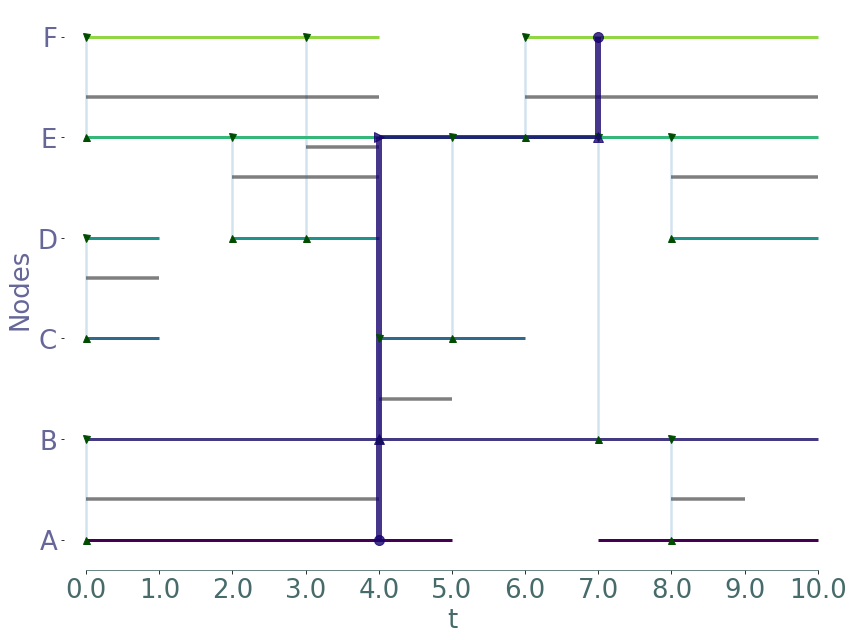

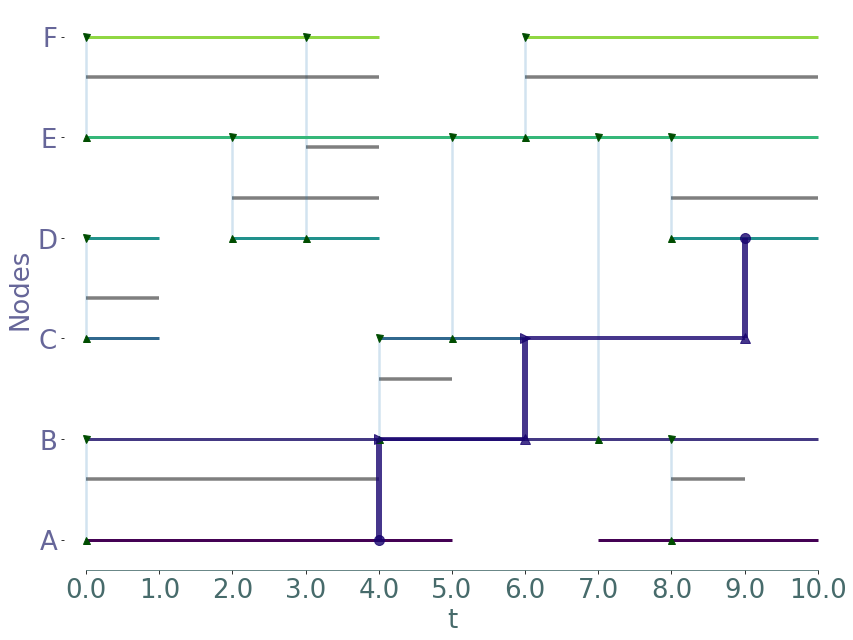

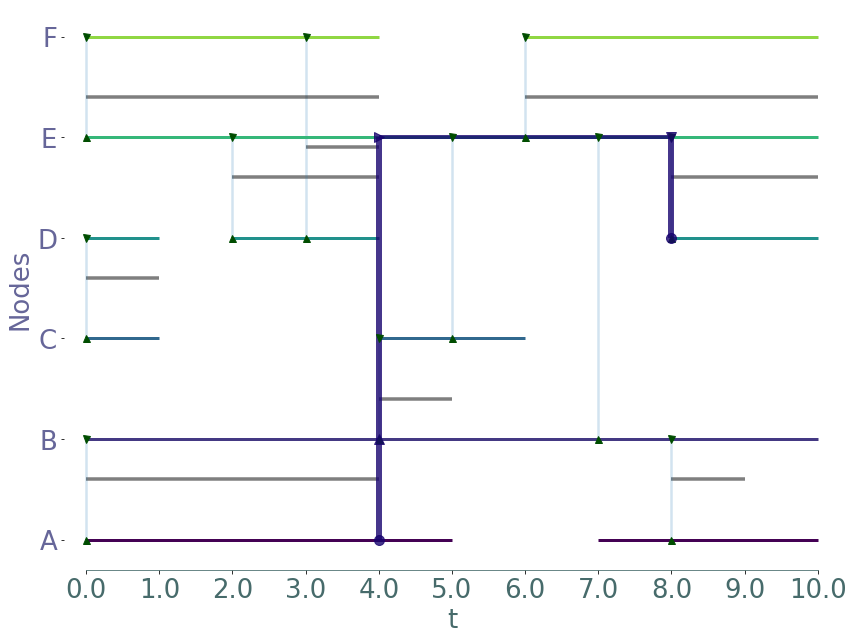

{5: 0, 4: 0.0, 3: 2.0, 2: 5.0, 1: 5.0, 0: 8.0}

In [7]:
P = sg.Path(times=[0, 3, 4, 6],
         links=[(5, 5), (5, 4), (4, 1), (1, 2)], )
P.plot(S, dag=True)

# FoP (0,A)-F
P = sg.Path(times=[0, 3, 6, 7, 7],
         links=[(0, 0), (0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFoP (0,A)-F
P = sg.Path(times=[0, 2, 4, 7],
         links=[(0, 0), (0, 1), (1, 4), (4, 5)], )
P.plot(S)

# FP A-F
P = sg.Path(times=[4, 6, 7, 7],
         links=[(0, 1), (1, 2), (2, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SFP A-F
P = sg.Path(times=[4, 4, 7],
         links=[(0, 1), (1, 4), (4, 5)], )
P.plot(S)
# plt.show()

# SP A-D
P = sg.Path(times=[4, 6, 9],
         links=[(0, 1), (1, 2), (2, 3)])
P.plot(S)
# plt.show()

#  FSP A-D
P = sg.Path(times=[4, 4, 8],
         links=[(0, 1), (1, 4), (4, 3)], )
P.plot(S)
plt.show()

S.times_to_reach((0, 5, 0))


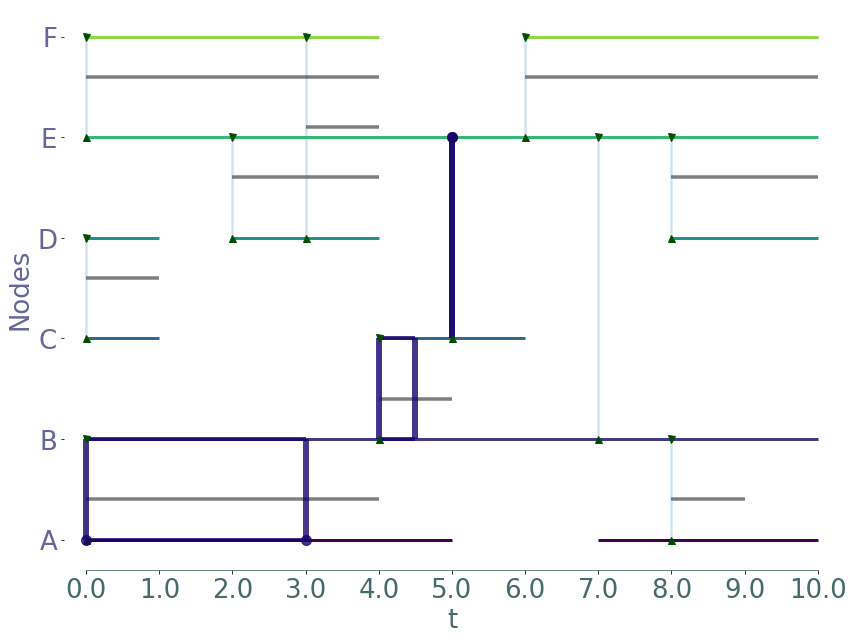

In [14]:
P = sg.Metawalk(time_intervals=[(0,3), (4,4.5), (5,5)],
         nodes=[0,1,2,4], )
P.plot(S)
plt.show()


In [16]:
print (P)

 0 (0, 3) 1 (4, 4.5) 2 (5, 5) 4


In [17]:
str(P).split(" ")

['', '0', '(0,', '3)', '1', '(4,', '4.5)', '2', '(5,', '5)', '4']

In [3]:
plt.rcParams["figure.figsize"] = (22,15)

In [1]:
import matplotlib.pyplot as plt
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "noeuds_jouet.sg",
                      path_links=path_directory + "liens_jouet.sg")
S.describe()

Nb of Nodes :  3
Nb of segmented nodes :  3.0
Nb of links :  2
Nb of segmented links :  4.0
Nb of event times :  8


In [2]:
l = S.metapaths(0)

In [3]:
for el in l:
    for e in el:
        print (e)

 0 (0.0, 2.0) 1 | volume = 0.0 + 2.0·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 (7.0, 8.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (0.0, 2.0) 1 (7.0, 8.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³
 0 (0.0, 2.0) 1 (3.0, 4.0) 2 | volume = 0.0 + 3.0·x¹ + 0.0·x² + 0.0·x³


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


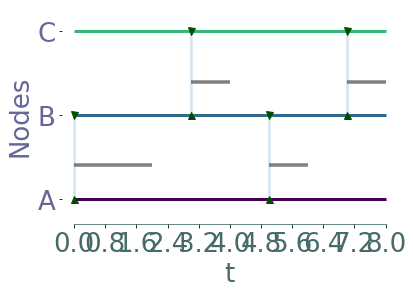

In [4]:
S.plot()

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "interlaping_nodes4.sg",
                      path_links=path_directory + "interlaping_links4.sg")
S.describe()

Nb of Nodes :  6
Nb of segmented nodes :  6.0
Nb of links :  17
Nb of segmented links :  24.0
Nb of event times :  19


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


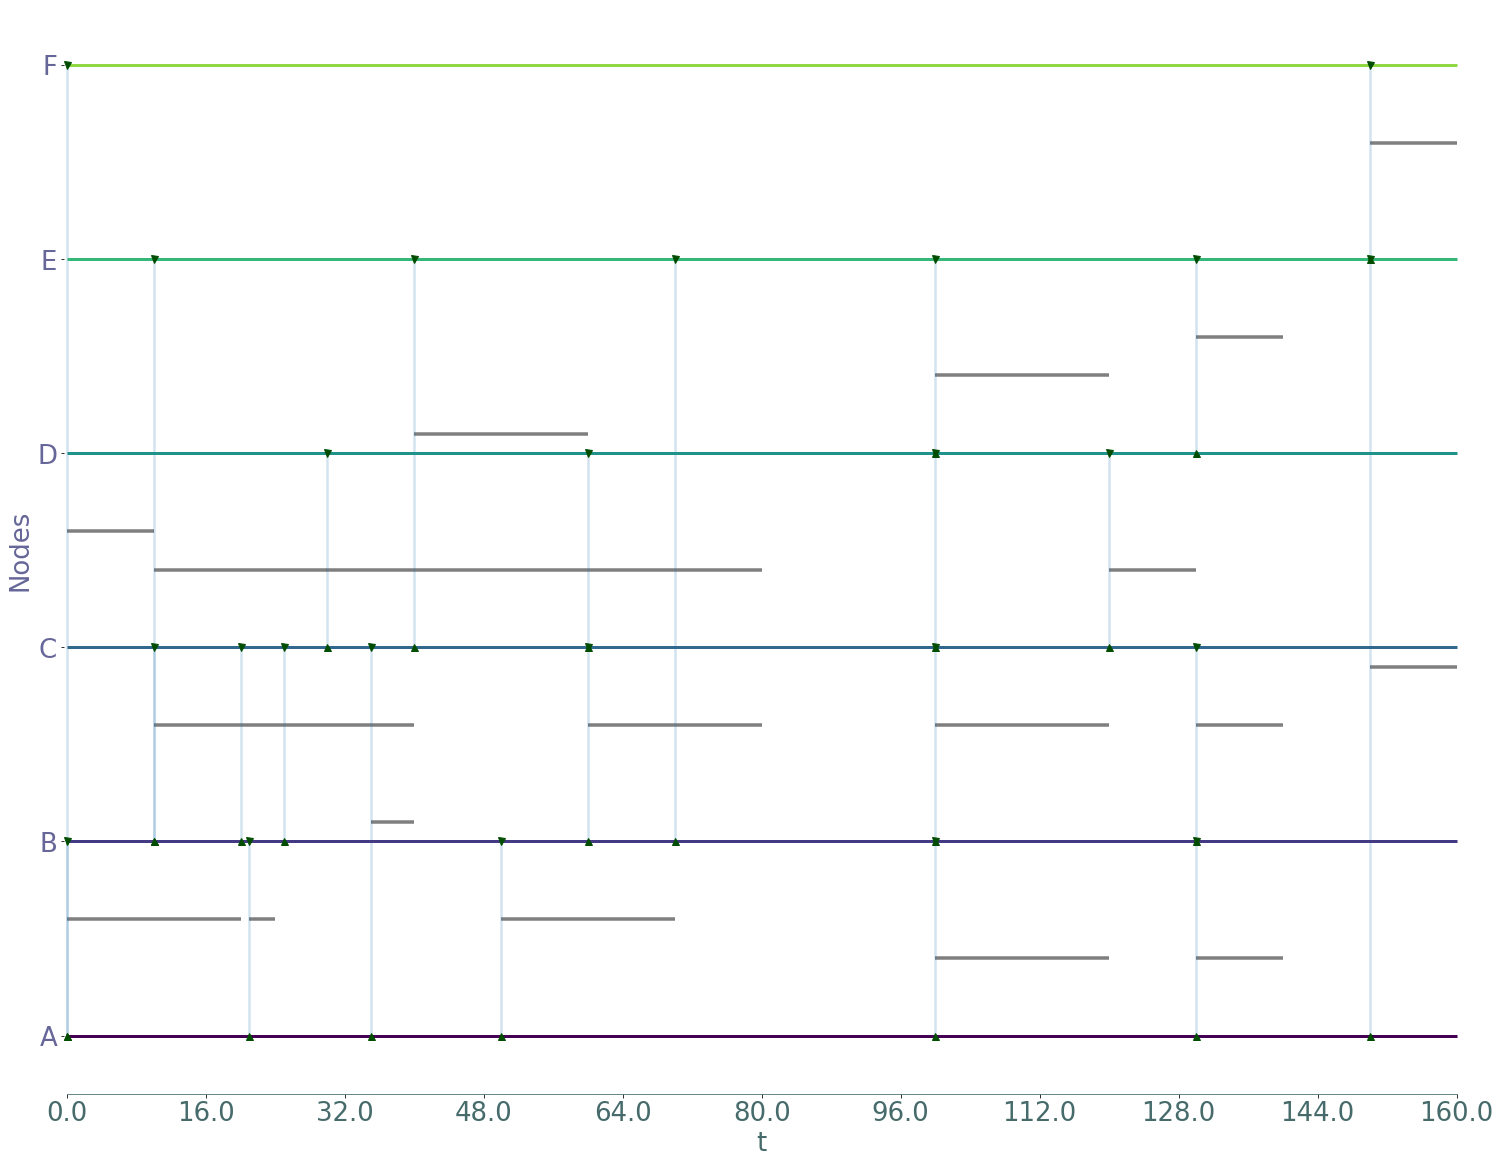

In [2]:
S.plot()

In [3]:
nouveau = S.fragmented_stream_graph()

<AxesSubplot:xlabel='t', ylabel='Nodes'>

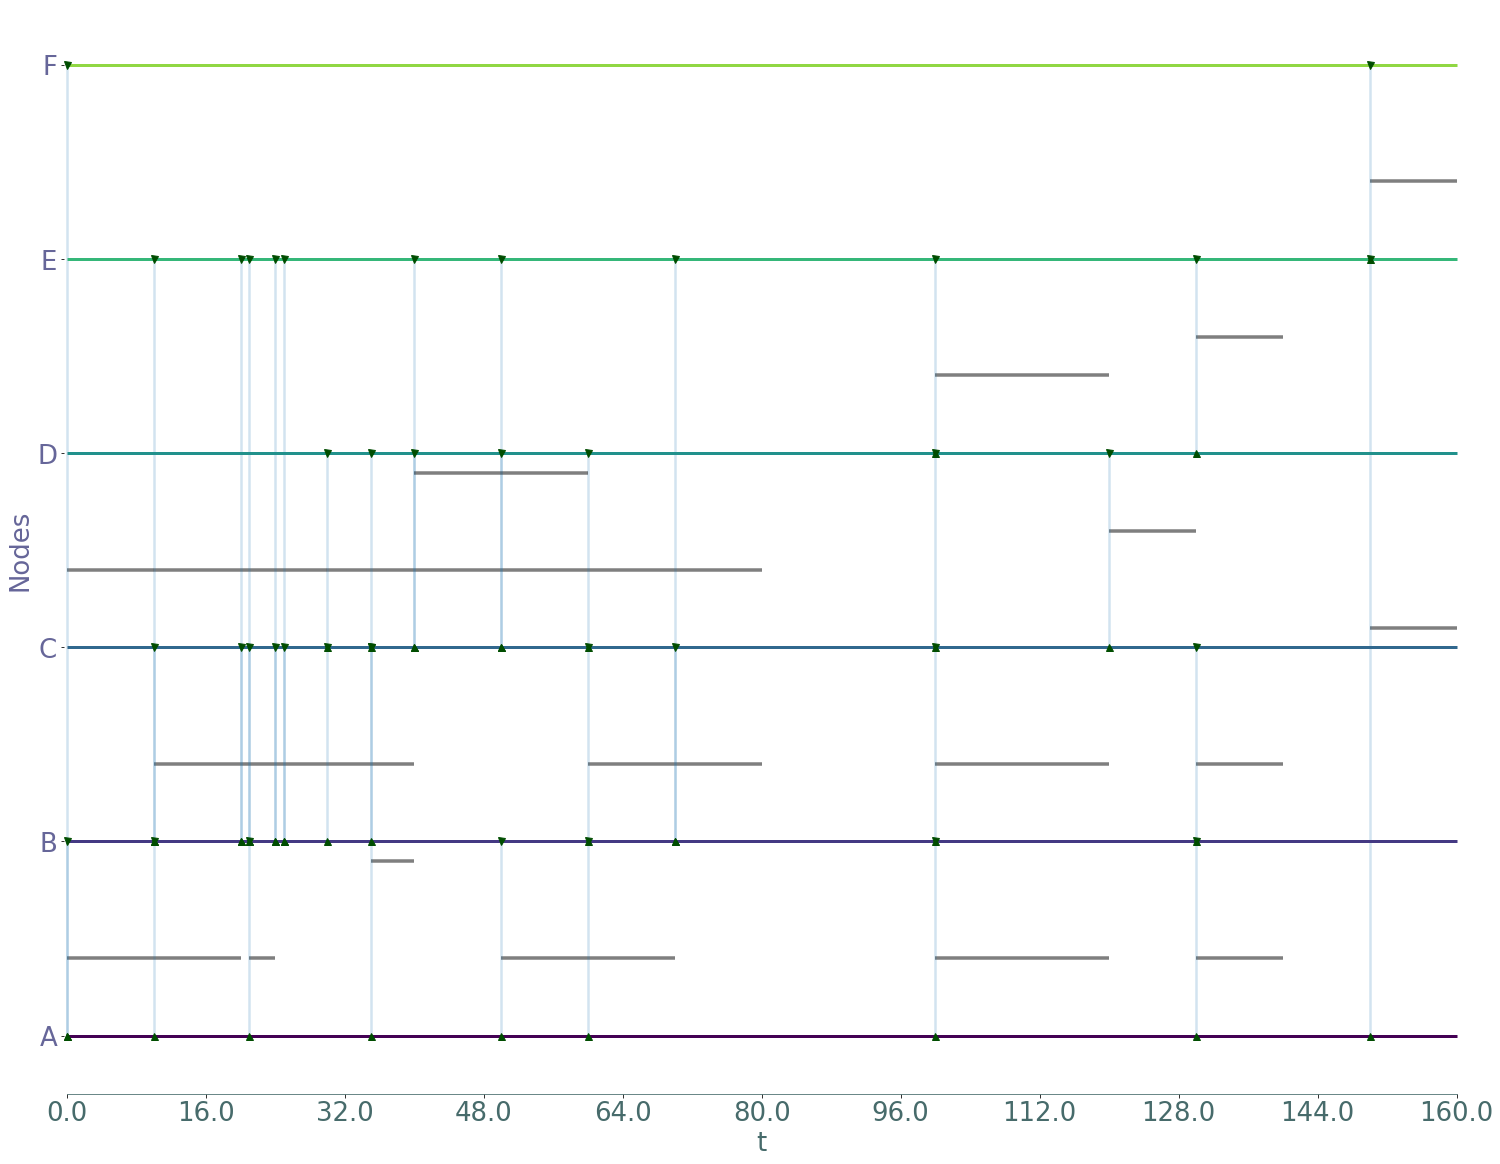

In [4]:
nouveau.plot()

In [5]:
node = 0
ll = nouveau.metapaths(node)
print("result : ")
i=0
for el in ll:
    for e in el:
        print (e)
        i += 1
print (i)

result : 
 0 (50.0, 60.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (21.0, 24.0) 1 | volume = 0.0 + 3.0·x¹ + 0.0·x²
 0 (10.0, 20.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (60.0, 70.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (100.0, 120.0) 1 | volume = 0.0 + 20.0·x¹ + 0.0·x²
 0 (0.0, 10.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (130.0, 140.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (0.0, 10.0) 1 (30.0, 35.0) 2 | volume = 0.0 + 15.0·x¹ + 0.0·x² + 0.0·x³
 0 (21.0, 24.0) 1 (60.0, 70.0) 2 | volume = 0.0 + 13.0·x¹ + 0.0·x² + 0.0·x³
 0 (21.0, 24.0) 1 (100.0, 120.0) 2 | volume = 0.0 + 23.0·x¹ + 0.0·x² + 0.0·x³
 0 (50.0, 60.0) 1 (60.0, 70.0) 2 | volume = 0.0 + 20.0·x¹ + 0.0·x² + 0.0·x³
 0 (50.0, 60.0) 1 (100.0, 120.0) 2 | volume = 0.0 + 30.0·x¹ + 0.0·x² + 0.0·x³
 0 (100.0, 120.0) 1 (130.0, 140.0) 2 | volume = 0.0 + 30.0·x¹ + 0.0·x² + 0.0·x³
 0 (21.0, 24.0) 1 (24.0, 25.0) 2 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³
 0 (21.0, 24.0) 1 (25.0, 30.0) 2 | volume = 0.0 + 8.0·x¹ + 0.0·x² + 0.0·x³
 0 (35.0, 4

In [6]:
ll = nouveau.filter_fastest_metapaths_slow( nouveau.metapaths(node))
print("result : ")
i=0
res = []
for el in ll:
    for e in el.values():
        for j in e:
            res.append(j)
            print (j)
            i += 1
print(i)

result : 
 0 (50.0, 60.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (21.0, 24.0) 1 | volume = 0.0 + 3.0·x¹ + 0.0·x²
 0 (10.0, 20.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (60.0, 70.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (100.0, 120.0) 1 | volume = 0.0 + 20.0·x¹ + 0.0·x²
 0 (0.0, 10.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (130.0, 140.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (50.0, 60.0) 1 (60.0, 70.0) 2 | volume = 0.0 + 20.0·x¹ + 0.0·x² + 0.0·x³
 0 (21.0, 24.0) 1 (24.0, 25.0) 2 | volume = 0.0 + 4.0·x¹ + 0.0·x² + 0.0·x³
 0 (35.0, 40.0) 2 | volume = 0.0 + 5.0·x¹ + 0.0·x²
 0 (100.0, 120.0) 1 (100.0, 120.0) 2 | volume = 0.0 + 0.0·x¹ + 10.0·x² + 0.0·x³
 0 (10.0, 20.0) 1 (20.0, 21.0) 2 | volume = 0.0 + 11.0·x¹ + 0.0·x² + 0.0·x³
 0 (60.0, 70.0) 1 (60.0, 70.0) 2 | volume = 0.0 + 0.0·x¹ + 5.0·x² + 0.0·x³
 0 (130.0, 140.0) 1 (130.0, 140.0) 2 | volume = 0.0 + 0.0·x¹ + 5.0·x² + 0.0·x³
 0 (0.0, 10.0) 1 (10.0, 20.0) 2 | volume = 0.0 + 20.0·x¹ + 0.0·x² + 0.0·x³
 0 (21.0, 24.0) 1 (21.0, 24.0) 2 | vo

In [7]:
l = nouveau.fastest_paths_from_vertex(node,0)
print("resultat : ")
res2=[]
i=0
for el in l:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res2.append(ee)
print(i)

resultat : 
 0 (0.0, 10.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (10.0, 20.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (21.0, 24.0) 1 | volume = 0.0 + 3.0·x¹ + 0.0·x²
 0 (50.0, 60.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (60.0, 70.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (100.0, 120.0) 1 | volume = 0.0 + 20.0·x¹ + 0.0·x²
 0 (130.0, 140.0) 1 | volume = 0.0 + 10.0·x¹ + 0.0·x²
 0 (0.0, 10.0) 1 (10.0, 20.0) 2 | volume = 0.0 + 20.0·x¹ + 0.0·x² + 0.0·x³
 0 (10.0, 20.0) 1 (10.0, 20.0) 2 | volume = 0.0 + 0.0·x¹ + 5.0·x² + 0.0·x³
 0 (21.0, 24.0) 1 (21.0, 24.0) 2 | volume = 0.0 + 0.0·x¹ + 1.5·x² + 0.0·x³
 0 (50.0, 60.0) 1 (60.0, 70.0) 2 | volume = 0.0 + 20.0·x¹ + 0.0·x² + 0.0·x³
 0 (60.0, 70.0) 1 (60.0, 70.0) 2 | volume = 0.0 + 0.0·x¹ + 5.0·x² + 0.0·x³
 0 (35.0, 40.0) 2 | volume = 0.0 + 5.0·x¹ + 0.0·x²
 0 (100.0, 120.0) 1 (100.0, 120.0) 2 | volume = 0.0 + 0.0·x¹ + 10.0·x² + 0.0·x³
 0 (130.0, 140.0) 1 (130.0, 140.0) 2 | volume = 0.0 + 0.0·x¹ + 5.0·x² + 0.0·x³
 0 (10.0, 20.0) 1 (20.0, 21.0) 2 | v

In [8]:
lll = nouveau.fastest_paths_from_vertex(node,1)
print("resultat : ")
res3=[]
i=0
for el in lll:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res3.append(ee)
print(i)

TypeError: 'tuple' object does not support item assignment

In [9]:
llll = nouveau.count_walks_paper(node)
print("resultat : ")

1 2 10.0 20.0
cur_best [{}, {0.0: (10.0, 1.0), 10.0: (20.0, 1.0), 20.0: (20.0, 1.0), 21.0: (24.0, 1.0), 24.0: (24.0, 1.0), 50.0: (60.0, 1.0), 60.0: (70.0, 1.0), 70.0: (70.0, 1.0)}, {}, {}, {}, {}]
pre [{}, {0.0: {(0, 0.0): (0.0, 10.0)}, 10.0: {(0, 0.0): (10.0, 20.0)}, 20.0: {(1, 0.0): (10.0, 20.0)}, 21.0: {(0, 0.0): (21.0, 24.0)}, 24.0: {(1, 0.0): (21.0, 24.0)}, 50.0: {(0, 0.0): (50.0, 60.0)}, 60.0: {(0, 0.0): (60.0, 70.0)}, 70.0: {(1, 0.0): (60.0, 70.0)}}, {}, {}, {}, {}]
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
comp (0.0, 2.0) (0.0, 2.0)
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
arrivals [0.0, 10.0, 20.0, 21.0, 24.0, 50.0, 60.0, 70.0]
2 1 10.0 20.0
cur_best [{}, {0.0: (10.0

arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
1 4 20.0 21.0
cur_best [{}, {0.0: (10.0, 1.0), 10.0: (20.0, 1.0), 20.0: (20.0, 1.0), 21.0: (24.0, 1.0), 24.0: (24.0, 1.0), 50.0: (60.0, 1.0), 60.0: (70.0, 1.0), 70.0: (70.0, 1.0), 25.0: (24.0, 3.0), 30.0: (24.0, 3.0), 35.0: (35.0, 2.0), 40.0: (40.0, 2.0), 80.0: (70.0, 3.0), 100.0: (120.0, 1.

arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
arrivals [40.0, 50.0, 60.0, 10.0, 20.0, 21.0, 24.0, 25.0, 30.0, 70.0, 80.0, 100.0, 120.0, 130.0, 140.0, 150.0, 160.0]
1 4 25.0 30.0
cur_best [{}, {0.0: (10.0, 1.0), 10.0: (20.0, 1.0), 20.0: (20.0, 1.0), 21.0: (24.0, 1.0), 24.0: (24.0, 1.0), 50.0: (60.0, 1.0), 60.0: (70.0, 1.0), 70.0: (70.0, 1.0), 25.0: (24.0, 3.0), 30.0: (24.0, 3.0), 35.0: (35.0, 2.0), 40.0: (40.0, 2.0), 80.0: (70.0, 3.0), 100.0: (120.0, 1.

cur_best [{}, {0.0: (10.0, 1.0), 10.0: (20.0, 1.0), 20.0: (20.0, 1.0), 21.0: (24.0, 1.0), 24.0: (24.0, 1.0), 50.0: (60.0, 1.0), 60.0: (70.0, 1.0), 70.0: (70.0, 1.0), 25.0: (24.0, 3.0), 30.0: (24.0, 3.0), 35.0: (35.0, 2.0), 40.0: (40.0, 2.0), 80.0: (70.0, 3.0), 100.0: (120.0, 1.0), 120.0: (120.0, 1.0), 130.0: (140.0, 1.0), 140.0: (140.0, 1.0)}, {10.0: (10.0, 2.0), 20.0: (20.0, 2.0), 21.0: (21.0, 2.0), 24.0: (24.0, 2.0), 25.0: (24.0, 2.0), 30.0: (24.0, 2.0), 35.0: (40.0, 1.0), 40.0: (40.0, 1.0), 60.0: (60.0, 2.0), 70.0: (70.0, 2.0), 80.0: (70.0, 2.0), 50.0: (40.0, 3.0), 100.0: (120.0, 2.0), 120.0: (120.0, 2.0), 130.0: (140.0, 2.0), 140.0: (140.0, 2.0)}, {30.0: (24.0, 3.0), 35.0: (35.0, 2.0), 40.0: (40.0, 2.0), 50.0: (40.0, 2.0), 60.0: (60.0, 3.0), 70.0: (70.0, 3.0), 100.0: (100.0, 3.0), 120.0: (120.0, 3.0), 130.0: (130.0, 3.0), 140.0: (130.0, 5.0)}, {40.0: (40.0, 2.0), 50.0: (40.0, 2.0), 60.0: (60.0, 3.0), 10.0: (10.0, 2.0), 20.0: (20.0, 2.0), 21.0: (21.0, 2.0), 24.0: (24.0, 2.0), 25.0: 

pre [{}, {0.0: {(0, 0.0): (0.0, 10.0)}, 10.0: {(0, 0.0): (10.0, 20.0)}, 20.0: {(1, 0.0): (10.0, 20.0)}, 21.0: {(0, 0.0): (21.0, 24.0)}, 24.0: {(1, 0.0): (21.0, 24.0)}, 50.0: {(0, 0.0): (50.0, 60.0)}, 60.0: {(0, 0.0): (60.0, 70.0)}, 70.0: {(1, 0.0): (60.0, 70.0)}, 25.0: {(2, 24.0): (24.0, 25.0), (2, 25.0): (25.0, 30.0), (4, 24.0): (24.0, 25.0), (4, 25.0): (25.0, 30.0)}, 30.0: {(2, 24.0): (25.0, 30.0), (1, 25.0): (25.0, 30.0), (2, 30.0): (30.0, 35.0), (2, 25.0): (30.0, 35.0), (4, 24.0): (25.0, 30.0), (4, 30.0): (30.0, 30.0), (4, 25.0): (25.0, 30.0)}, 35.0: {(2, 35.0): (35.0, 40.0)}, 40.0: {(1, 35.0): (35.0, 40.0), (2, 40.0): (40.0, 40.0), (2, 35.0): (35.0, 40.0)}, 80.0: {(2, 70.0): (70.0, 80.0), (2, 80.0): (80.0, 80.0), (4, 70.0): (70.0, 80.0), (4, 80.0): (80.0, 80.0)}, 100.0: {(0, 0.0): (100.0, 120.0)}, 120.0: {(1, 0.0): (100.0, 120.0)}, 130.0: {(0, 0.0): (130.0, 140.0)}, 140.0: {(1, 0.0): (130.0, 140.0)}}, {10.0: {(1, 0.0): (10.0, 20.0), (1, 10.0): (10.0, 20.0)}, 20.0: {(2, 10.0): (10.

In [10]:
#cur_best
print(llll[1][5])

{0.0: (10.0, 1.0), 10.0: (10.0, 1.0), 150.0: (160.0, 2.0), 160.0: (160.0, 2.0)}


In [11]:
#pre
print(llll[0][5])

{0.0: {(0, 0.0): (0.0, 10.0)}, 10.0: {(5, 0.0): (0.0, 10.0)}, 150.0: {(4, 150.0): (150.0, 160.0)}, 160.0: {(5, 150.0): (150.0, 160.0), (4, 160.0): (160.0, 160.0), (4, 150.0): (150.0, 160.0)}}


In [12]:
#cur_best
print(llll[1][4])

{40.0: (40.0, 2.0), 50.0: (40.0, 2.0), 60.0: (60.0, 3.0), 10.0: (10.0, 2.0), 20.0: (20.0, 2.0), 21.0: (21.0, 2.0), 24.0: (24.0, 2.0), 25.0: (24.0, 2.0), 30.0: (24.0, 2.0), 70.0: (70.0, 2.0), 80.0: (70.0, 2.0), 100.0: (100.0, 4.0), 120.0: (120.0, 4.0), 130.0: (130.0, 4.0), 140.0: (130.0, 4.0), 150.0: (160.0, 1.0), 160.0: (160.0, 1.0)}


In [13]:
#pre
print(llll[0][4])

{40.0: {(2, 35.0): (40.0, 50.0), (2, 40.0): (40.0, 50.0)}, 50.0: {(4, 35.0): (40.0, 50.0), (4, 40.0): (40.0, 50.0), (2, 35.0): (50.0, 60.0), (2, 40.0): (50.0, 60.0)}, 60.0: {(2, 60.0): (60.0, 60.0)}, 10.0: {(1, 0.0): (10.0, 20.0), (1, 10.0): (10.0, 20.0)}, 20.0: {(4, 10.0): (10.0, 20.0), (1, 20.0): (20.0, 21.0), (1, 10.0): (20.0, 21.0)}, 21.0: {(1, 21.0): (21.0, 24.0)}, 24.0: {(4, 21.0): (21.0, 24.0), (1, 24.0): (24.0, 25.0), (1, 21.0): (24.0, 25.0)}, 25.0: {(4, 21.0): (24.0, 25.0), (4, 24.0): (24.0, 25.0), (1, 21.0): (25.0, 30.0), (1, 24.0): (25.0, 30.0)}, 30.0: {(4, 21.0): (25.0, 30.0), (4, 24.0): (25.0, 30.0), (1, 21.0): (25.0, 30.0), (1, 24.0): (25.0, 30.0)}, 70.0: {(1, 60.0): (70.0, 80.0), (1, 70.0): (70.0, 80.0)}, 80.0: {(4, 60.0): (70.0, 80.0), (4, 70.0): (70.0, 80.0), (1, 60.0): (70.0, 80.0), (1, 70.0): (70.0, 80.0)}, 100.0: {(3, 100.0): (100.0, 120.0)}, 120.0: {(3, 120.0): (120.0, 120.0)}, 130.0: {(3, 130.0): (130.0, 140.0)}, 140.0: {(4, 130.0): (130.0, 140.0), (3, 130.0): (13

In [14]:
#cur_best
print(llll[1][3])

{30.0: (24.0, 3.0), 35.0: (35.0, 2.0), 40.0: (40.0, 2.0), 50.0: (40.0, 2.0), 60.0: (60.0, 3.0), 70.0: (70.0, 3.0), 100.0: (100.0, 3.0), 120.0: (120.0, 3.0), 130.0: (130.0, 3.0), 140.0: (130.0, 5.0)}


In [15]:
#pre
print(llll[0][3])

{30.0: {(2, 24.0): (30.0, 35.0), (2, 25.0): (30.0, 35.0), (2, 30.0): (30.0, 35.0)}, 35.0: {(2, 35.0): (35.0, 40.0)}, 40.0: {(3, 35.0): (35.0, 40.0), (2, 40.0): (40.0, 50.0), (2, 35.0): (40.0, 50.0)}, 50.0: {(3, 35.0): (40.0, 50.0), (3, 40.0): (40.0, 50.0), (2, 35.0): (50.0, 60.0), (2, 40.0): (50.0, 60.0)}, 60.0: {(2, 60.0): (60.0, 70.0)}, 70.0: {(2, 70.0): (70.0, 70.0)}, 100.0: {(2, 100.0): (100.0, 100.0)}, 120.0: {(2, 100.0): (120.0, 130.0), (2, 120.0): (120.0, 130.0)}, 130.0: {(2, 130.0): (130.0, 130.0)}, 140.0: {(4, 130.0): (130.0, 140.0), (4, 140.0): (140.0, 140.0)}}


In [16]:
#cur_best
print(llll[1][2])

{10.0: (10.0, 2.0), 20.0: (20.0, 2.0), 21.0: (21.0, 2.0), 24.0: (24.0, 2.0), 25.0: (24.0, 2.0), 30.0: (24.0, 2.0), 35.0: (40.0, 1.0), 40.0: (40.0, 1.0), 60.0: (60.0, 2.0), 70.0: (70.0, 2.0), 80.0: (70.0, 2.0), 50.0: (40.0, 3.0), 100.0: (120.0, 2.0), 120.0: (120.0, 2.0), 130.0: (140.0, 2.0), 140.0: (140.0, 2.0)}


In [17]:
#pre
print(llll[0][2])

{10.0: {(1, 0.0): (10.0, 20.0), (1, 10.0): (10.0, 20.0)}, 20.0: {(2, 10.0): (10.0, 20.0), (1, 20.0): (20.0, 21.0), (1, 10.0): (20.0, 21.0)}, 21.0: {(1, 21.0): (21.0, 24.0)}, 24.0: {(2, 21.0): (21.0, 24.0), (1, 24.0): (24.0, 25.0), (1, 21.0): (24.0, 25.0)}, 25.0: {(2, 21.0): (24.0, 25.0), (2, 24.0): (24.0, 25.0), (1, 21.0): (25.0, 30.0), (1, 24.0): (25.0, 30.0)}, 30.0: {(2, 21.0): (25.0, 30.0), (2, 24.0): (25.0, 30.0), (1, 21.0): (30.0, 35.0), (1, 24.0): (30.0, 35.0)}, 35.0: {(0, 0.0): (35.0, 40.0)}, 40.0: {(2, 0.0): (35.0, 40.0)}, 60.0: {(1, 50.0): (60.0, 70.0), (1, 60.0): (60.0, 70.0)}, 70.0: {(2, 60.0): (60.0, 70.0), (1, 70.0): (70.0, 80.0), (1, 60.0): (70.0, 80.0)}, 80.0: {(2, 60.0): (70.0, 80.0), (2, 70.0): (70.0, 80.0), (1, 60.0): (70.0, 80.0), (1, 70.0): (70.0, 80.0)}, 50.0: {(4, 40.0): (40.0, 50.0), (4, 50.0): (50.0, 60.0), (3, 40.0): (40.0, 50.0), (3, 50.0): (50.0, 60.0)}, 100.0: {(1, 100.0): (100.0, 120.0)}, 120.0: {(2, 100.0): (100.0, 120.0), (1, 120.0): (120.0, 120.0), (1, 1

In [18]:
#cur_best
print(llll[1][1])

{0.0: (10.0, 1.0), 10.0: (20.0, 1.0), 20.0: (20.0, 1.0), 21.0: (24.0, 1.0), 24.0: (24.0, 1.0), 50.0: (60.0, 1.0), 60.0: (70.0, 1.0), 70.0: (70.0, 1.0), 25.0: (24.0, 3.0), 30.0: (24.0, 3.0), 35.0: (35.0, 2.0), 40.0: (40.0, 2.0), 80.0: (70.0, 3.0), 100.0: (120.0, 1.0), 120.0: (120.0, 1.0), 130.0: (140.0, 1.0), 140.0: (140.0, 1.0)}


In [19]:
#pre
print(llll[0][1])

{0.0: {(0, 0.0): (0.0, 10.0)}, 10.0: {(0, 0.0): (10.0, 20.0)}, 20.0: {(1, 0.0): (10.0, 20.0)}, 21.0: {(0, 0.0): (21.0, 24.0)}, 24.0: {(1, 0.0): (21.0, 24.0)}, 50.0: {(0, 0.0): (50.0, 60.0)}, 60.0: {(0, 0.0): (60.0, 70.0)}, 70.0: {(1, 0.0): (60.0, 70.0)}, 25.0: {(2, 24.0): (24.0, 25.0), (2, 25.0): (25.0, 30.0), (4, 24.0): (24.0, 25.0), (4, 25.0): (25.0, 30.0)}, 30.0: {(2, 24.0): (25.0, 30.0), (1, 25.0): (25.0, 30.0), (2, 30.0): (30.0, 35.0), (2, 25.0): (30.0, 35.0), (4, 24.0): (25.0, 30.0), (4, 30.0): (30.0, 30.0), (4, 25.0): (25.0, 30.0)}, 35.0: {(2, 35.0): (35.0, 40.0)}, 40.0: {(1, 35.0): (35.0, 40.0), (2, 40.0): (40.0, 40.0), (2, 35.0): (35.0, 40.0)}, 80.0: {(2, 70.0): (70.0, 80.0), (2, 80.0): (80.0, 80.0), (4, 70.0): (70.0, 80.0), (4, 80.0): (80.0, 80.0)}, 100.0: {(0, 0.0): (100.0, 120.0)}, 120.0: {(1, 0.0): (100.0, 120.0)}, 130.0: {(0, 0.0): (130.0, 140.0)}, 140.0: {(1, 0.0): (130.0, 140.0)}}


In [20]:
#cur_best
print(llll[1][0])

{}


In [21]:
#pre
print(llll[0][0])

{}


In [22]:
lat = nouveau.latencies(llll[1])

In [23]:
nouveau.contribution_each_latency(lat)[4]

{10.0: (0, 150.0),
 20.0: (0, 150.0),
 21.0: (0, 150.0),
 24.0: (0, 150.0),
 40.0: (0, 150.0),
 60.0: (40.0, 70.0),
 70.0: (0, 150.0),
 100.0: (70.0, 150.0),
 120.0: (70.0, 150.0),
 130.0: (70.0, 150.0),
 150.0: (0, 160.0)}

In [24]:
lat[3]

{30.0: (24.0, 3.0),
 35.0: (35.0, 2.0),
 40.0: (40.0, 2.0),
 60.0: (60.0, 3.0),
 70.0: (70.0, 3.0),
 100.0: (100.0, 3.0),
 120.0: (120.0, 3.0),
 130.0: (130.0, 3.0)}

In [25]:
G = nouveau.predecessor_graph(llll[0])

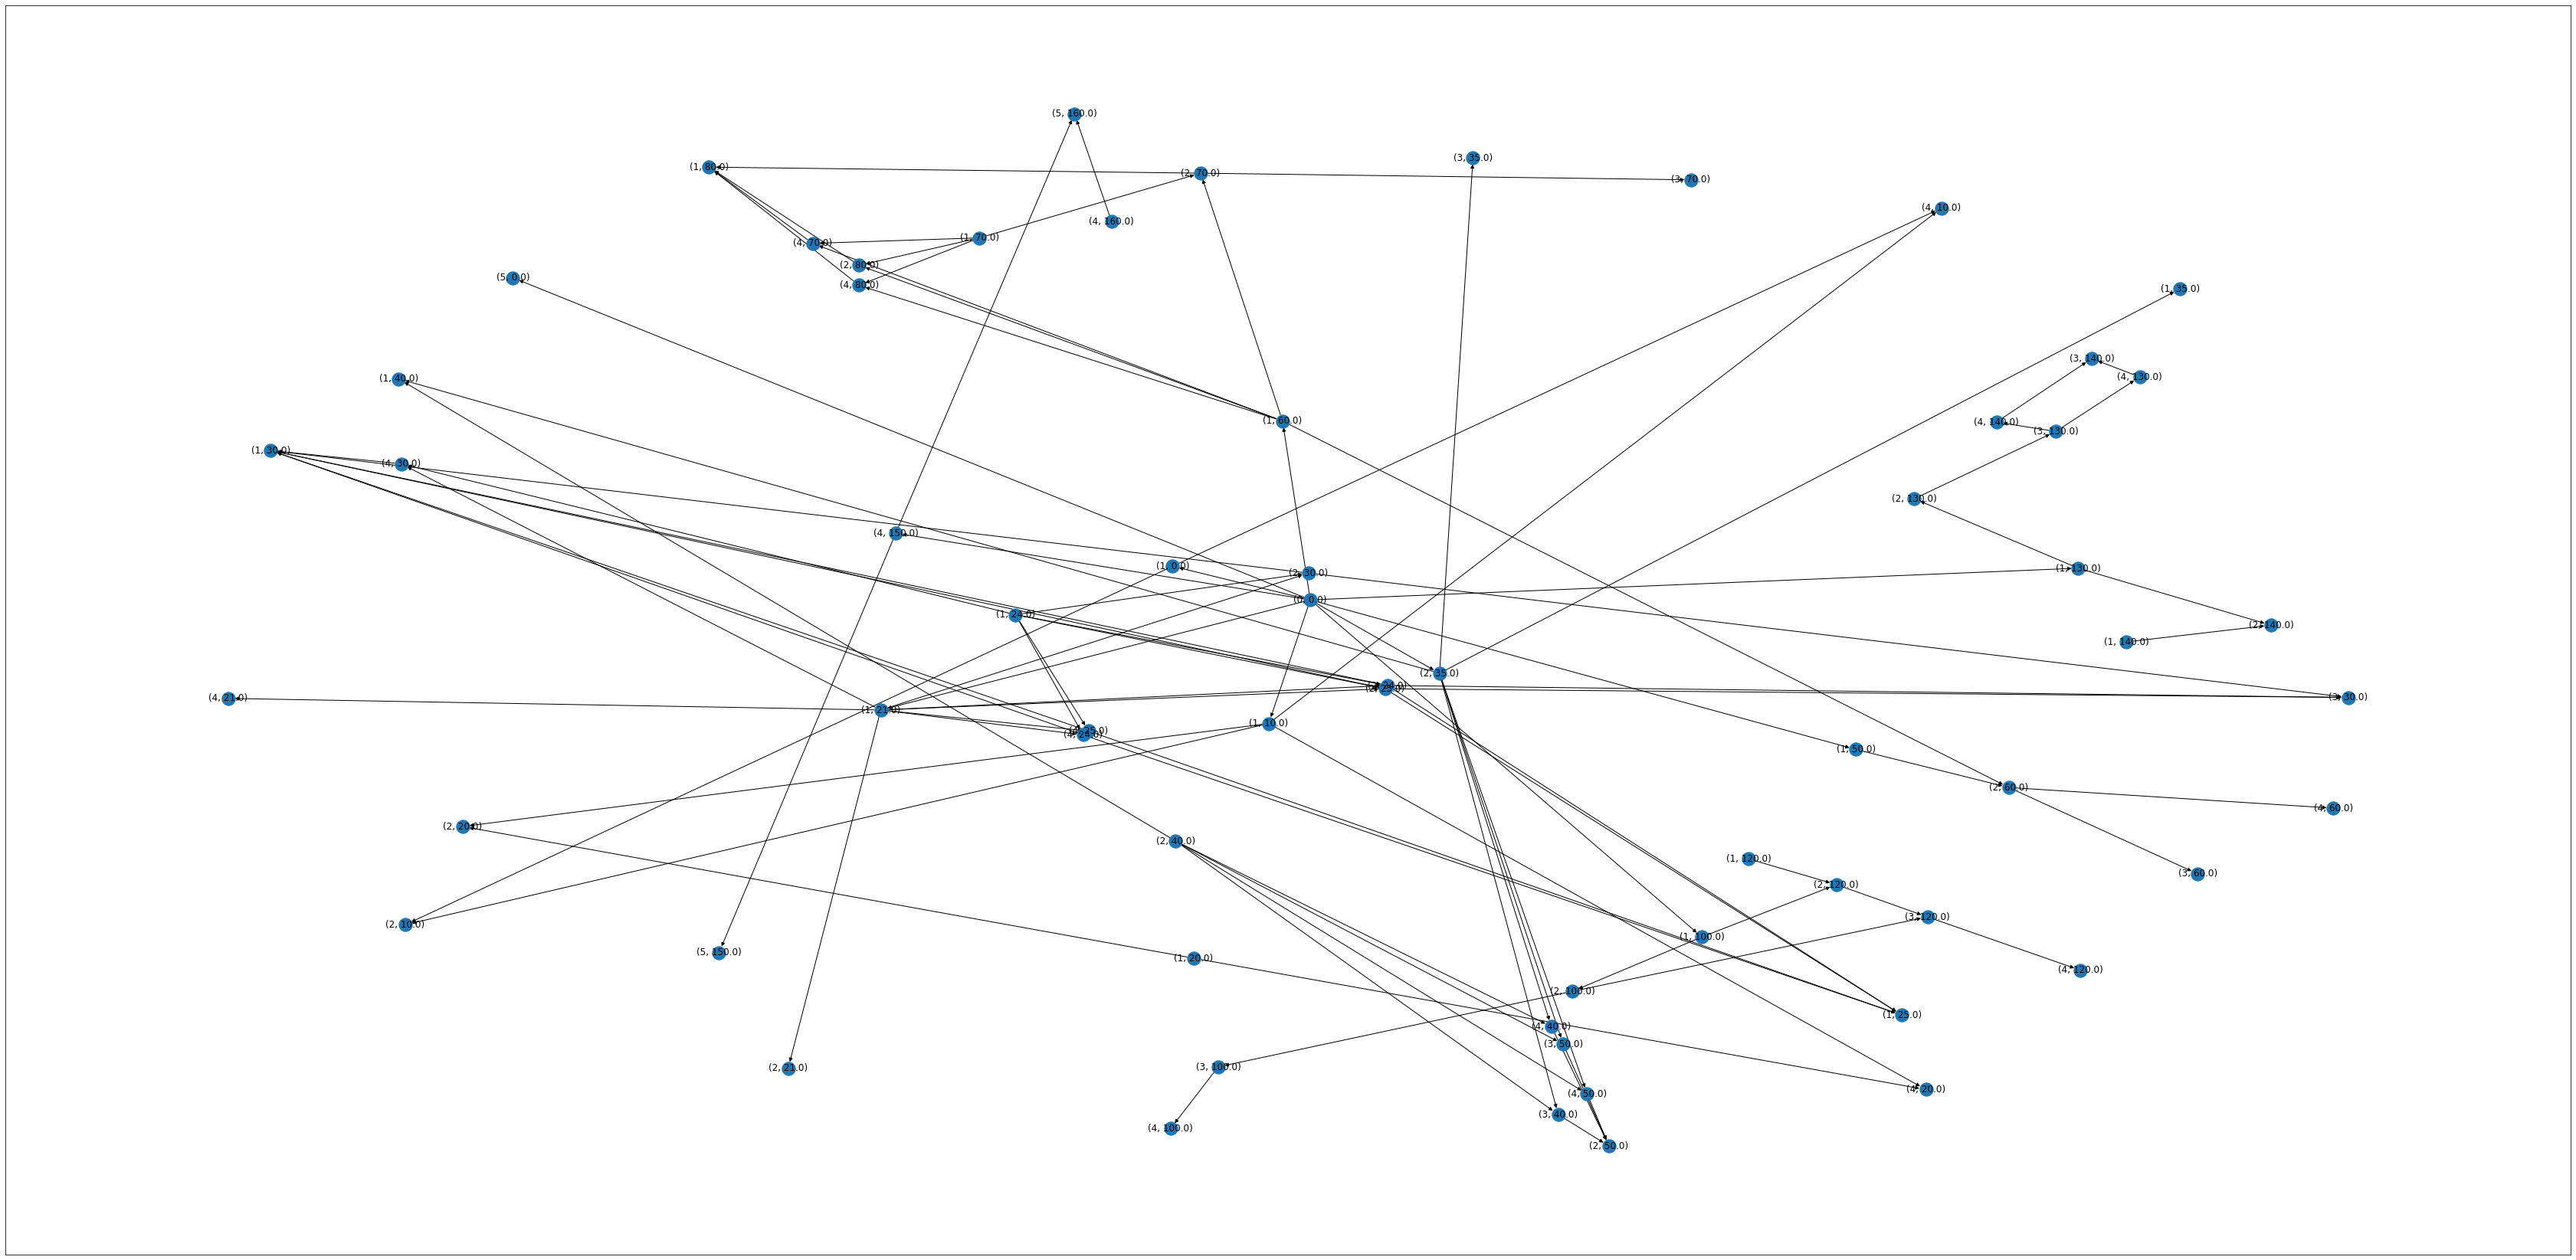

In [26]:
import networkx as nx
fig, ax = plt.subplots(figsize=(60,30))
nx.draw_networkx(G,arrows=True,width = 1,ax = ax)

In [27]:
G[(0,0.0)][(1,24.0)]

KeyError: (1, 24.0)

In [28]:
len(list(nx.simple_cycles(G)))

0

In [29]:
for e in nx.all_simple_paths(G,(0,0.0),(3,30.0)):
    print(e)

[(0, 0.0), (1, 21.0), (2, 24.0), (3, 30.0)]
[(0, 0.0), (1, 21.0), (2, 25.0), (3, 30.0)]
[(0, 0.0), (1, 21.0), (2, 30.0), (3, 30.0)]


In [30]:
paths = nx.all_simple_paths(G,(0,0.0),(3,30.0))
for path in map(nx.utils.pairwise, paths):
    #print(list(path))
    for e in path:
        print(G[e[0]][e[1]]['interval'],end="")
    print("")
    

(21.0, 24.0)(24.0, 25.0)(30.0, 35.0)
(21.0, 24.0)(25.0, 30.0)(30.0, 35.0)
(21.0, 24.0)(30.0, 35.0)(30.0, 35.0)


In [31]:
for e in res:
    if e not in res2:
        print(e)

In [32]:
for e in res2:
    if e not in res:
        print(e)

In [12]:
for e in res:
    if e not in res3:
        print(e)

 0 (0.0, 1.0) 1 (1.0, 2.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (5.0, 6.0) 1 (6.0, 7.0) 2 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³
 0 (5.0, 6.0) 1 (6.0, 7.0) 2 (6.0, 7.0) 3 | volume = 0.0 + 1.0·x¹ + 0.5·x² + 0.0·x³ + 0.0·x⁴
 0 (0.0, 1.0) 1 (1.0, 2.0) 4 | volume = 0.0 + 2.0·x¹ + 0.0·x² + 0.0·x³


In [13]:
for e in res3:
    if e not in res:
        print(e)

 0 (0.0, 1.0) 5 | volume = 0.0 + 1.0·x¹ + 0.0·x²


In [35]:
for e in res3:
    print(e)
    print("=>",e.fastest_meta_walk())

NameError: name 'res3' is not defined

In [16]:
for e in res3:
    print(e.fastest_meta_walk())

 0 (0.0, 1.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (2.1, 2.4) 1 | volume = 0.0 + 0.3·x¹ + 0.0·x²
 0 (5.0, 6.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (6.0, 7.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 (1.0, 2.0) 2 | volume = 0.0 + 0.0·x¹ + 0.5·x² + 0.0·x³
 0 (2.1, 2.4) 1 (2.1, 2.4) 2 | volume = 0.0 + 0.0·x¹ + 0.15·x² + 0.0·x³
 0 (6.0, 7.0) 1 (6.0, 7.0) 2 | volume = 0.0 + 0.0·x¹ + 0.5·x² + 0.0·x³
 0 (3.5, 4.0) 2 | volume = 0.0 + 0.5·x¹ + 0.0·x²
 0 (2.0, 2.0) 1 (2.0, 2.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (2.4, 2.4) 1 (2.4, 2.4) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (7.0, 7.0) 1 (7.0, 7.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (2.4, 2.4) 1 (2.4, 2.5) 2 (3.0, 3.0) 3 | volume = 0.0 + 0.1·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (2.4, 2.4) 1 (3.0, 3.0) 2 (3.0, 3.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (2.4, 2.4) 1 (2.5, 3.0) 2 (3.0, 3.0) 3 | volume = 0.0 + 0.5·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴


In [12]:
for e in res:
    if e.passes_through(2.4,1):
        print(e)

 0 (0.0, 1.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (1.0, 2.0) 1 | volume = 0.0 + 1.0·x¹ + 0.0·x²
 0 (2.1, 2.4) 1 | volume = 0.0 + 0.3·x¹ + 0.0·x²
 0 (2.1, 2.4) 1 (3.0, 3.5) 2 (3.0, 3.5) 3 | volume = 0.0 + 0.3·x¹ + 0.25·x² + 0.0·x³ + 0.0·x⁴
 0 (2.1, 2.4) 1 (2.5, 3.0) 2 (3.0, 3.5) 3 | volume = 0.0 + 1.3·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴


In [13]:
nouveau.betweenness_temporal_node(2.4,1)

TypeError: fastest_paths_from_vertex() missing 1 required positional argument: 'boo'

In [37]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (22,15)
import straph as sg
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_8_nodes.sg",
                      path_links=path_directory + "latapy_test_8_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  4
Nb of segmented links :  7.0
Nb of event times :  12


<AxesSubplot:xlabel='t', ylabel='Nodes'>

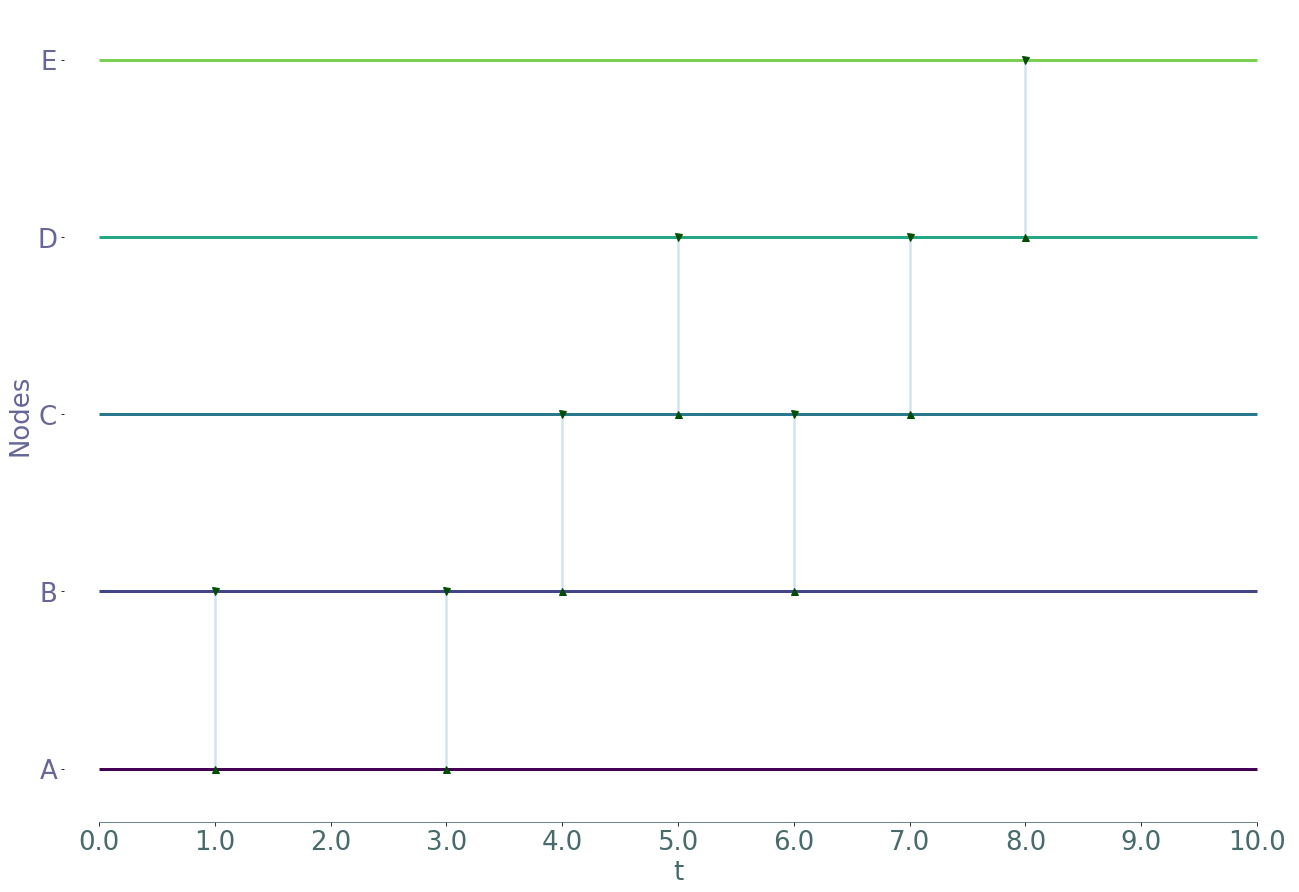

In [38]:
S.plot()

In [39]:
nouveau = S.fragmented_stream_graph()

<AxesSubplot:xlabel='t', ylabel='Nodes'>

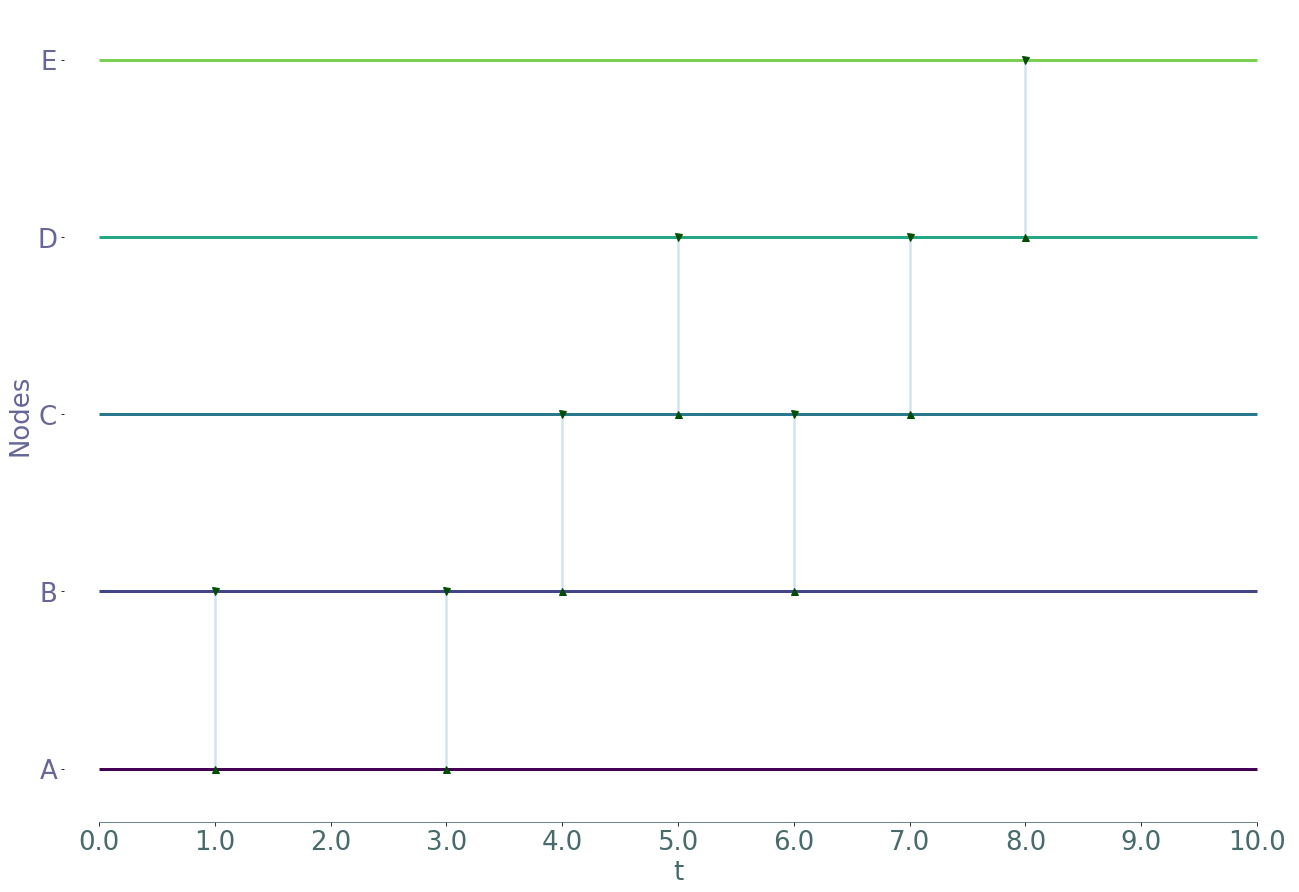

In [40]:
nouveau.plot()

In [41]:
node = 0
l = nouveau.fastest_paths_from_vertex(node)
print("resultat : ")
res2=[]
i=0
for el in l:
    for e in el.values():
        for ee in e:
            i +=1
            print(ee)
            res2.append(ee)
print(i)

resultat : 
 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
7


In [42]:
for e in res2:
    if e.passes_through(3.5,1):
        print(e)

 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴
 0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴


In [43]:
for e in l:
    print(e.keys())

dict_keys([])
dict_keys([(1.0, 1.0), (3.0, 3.0)])
dict_keys([(3.0, 4.0)])
dict_keys([(3.0, 5.0)])
dict_keys([(3.0, 8.0)])


In [44]:
nouveau.betweenness_temporal_node(3.5,1)

all_fastest [[set(), { 0 (1.0, 1.0) 1 | volume = 1.0 + 0.0·x¹,  0 (3.0, 3.0) 1 | volume = 1.0 + 0.0·x¹}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹ + 0.0·x²}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³}, { 0 (3.0, 3.0) 1 (4.0, 4.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴,  0 (3.0, 3.0) 1 (4.0, 4.0) 2 (5.0, 5.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴,  0 (3.0, 3.0) 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³ + 0.0·x⁴}], [set(), set(), { 1 (4.0, 4.0) 2 | volume = 1.0 + 0.0·x¹,  1 (6.0, 6.0) 2 | volume = 1.0 + 0.0·x¹}, { 1 (6.0, 6.0) 2 (7.0, 7.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²,  1 (4.0, 4.0) 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹ + 0.0·x²}, { 1 (6.0, 6.0) 2 (7.0, 7.0) 3 (8.0, 8.0) 4 | volume = 1.0 + 0.0·x¹ + 0.0·x² + 0.0·x³}], [set(), set(), set(), { 2 (5.0, 5.0) 3 | volume = 1.0 + 0.0·x¹,  2 (7.0, 7.0) 3 | volume = 1.0 + 0.0·x¹}

0